# STUDENT PERFORMANCES
## Machine Learning project
## Team: Amadou and Jamie

* Analysis of student performances
* Features: 33 
* Data: 649

There are 2 different csv files in the data folder. One (student-port.csv) being the data set of the students that took the portugese language course and another (student-mat.csv) of the students that are taking the math course. There are 382 students that are taking both courses. 

More information about the dataset is in the data folder, labeled student.txt

In [1]:
# Importing the libraries to be used:
import numpy as np
import pandas as pd
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler, PolynomialFeatures  
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn import metrics
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("data\student-por.csv",sep=";") #read file from different directory
df2 = pd.read_csv("data\student-mat.csv", sep = ";")
print(df1)
#df1.to_csv("port.csv") # made in to a csv after being made in to a table - easier to read compared to original excel file


    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [3]:
#Splitting the data accordingly
X = df1.iloc[:, :30]
y = 0.3 * df1.iloc[:, 30] + 0.3 * df1.iloc[:, 31] + 0.4 * df1.iloc[:, 32]
X.dropna()
y.dropna()

0       7.7
1      10.4
2      12.3
3      14.0
4      12.4
       ... 
644    10.3
645    15.4
646    10.5
647    10.0
648    10.7
Length: 649, dtype: float64

In [4]:
def fixingfile(X):
    switch = {0: ("GP", "MS"), 1: ("F", "M"), 3: ("U", "R"), 4: ("LE3", "GT3"), 5:("T", "A"), 15:("yes","no"), 16:("yes","no"),
             17:("yes","no"), 18:("yes","no"), 19:("yes","no"), 20:("yes","no"), 21:("yes","no"), 22:("yes","no")}
    for column in range(len(X.columns)):
        if column not in switch:
            continue
        for i in range(len(X.iloc[:,column])):
           #print(X.iloc[i, column] == "U",X.iloc[i, column], switch[column])
            if X.iloc[i,column] == switch[column][0]:
                #print(X.iloc[i, column], switch[column][0])
                X.iloc[i,column] = 1
            elif X.iloc[i, column] == switch[column][1]:
                X.iloc[i,column] = 0
    X.drop(["Mjob", "Fjob", "reason", "guardian"], axis = 1, inplace=True) #Remove the ones with more than 1 and 0 answers
    print(X.shape) #Checking the shape of the features
    
    return X

In [5]:
X_fixed = fixingfile(X)
#X_fixed.to_csv("portfix.csv") 
y = np.array(y) #changed to array to be easier to work with
X = np.array(X_fixed)


(649, 26)


In [6]:
X_scale = StandardScaler()
X = np.array(X_scale.fit_transform(X))

In [7]:
#Split the data into training and test set.  60% training and %40 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Linear Regression

## 1. Multiple Linear Regression
### Some of the code below are taken from hw2

In [8]:
#reshaping ys to 2d
y_2d_train = y_train.reshape(y_train.shape[0], 1)
y_2d_test = y_test.reshape(y_test.shape[0],1)
print("Checking y_2d_train is in 2d:", y_2d_train.shape)
print("Checking y_2d_test is in 2d:", y_2d_test.shape)

Checking y_2d_train is in 2d: (389, 1)
Checking y_2d_test is in 2d: (260, 1)


In [9]:
n_train = y_2d_train.shape[0]
n_test = y_2d_test.shape[0]
print("Number training of rows:", n_train)
print("Number testing of rows:", n_test)

Number training of rows: 389
Number testing of rows: 260


In [10]:
# Adding the column of ones infront of x_train
ones_train = np.ones((n_train, 1))
X_1_train = np.hstack((ones_train, X_train))
print("X_1 shape:", X_1_train.shape)
print("X_1 with ones: ", X_1_train)

X_1 shape: (389, 27)
X_1 with ones:  [[ 1.          0.73094388  0.83337685 ... -0.99769466  1.01290255
  -0.78915946]
 [ 1.          0.73094388  0.83337685 ...  0.56067799  1.01290255
   2.66121183]
 [ 1.          0.73094388  0.83337685 ... -0.99769466  1.01290255
  -0.78915946]
 ...
 [ 1.          0.73094388  0.83337685 ... -0.99769466  0.32093018
   0.07343336]
 [ 1.          0.73094388  0.83337685 ... -0.99769466 -0.3710422
  -0.78915946]
 [ 1.         -1.36809408  0.83337685 ... -0.99769466 -0.3710422
  -0.35786305]]


In [11]:
#Adding ones to testing set
ones_test = np.ones((n_test, 1))
X_1_test = np.hstack((ones_test, X_test))
print("X_1_test shape:", X_1_test.shape)
print("X_1_test with ones: ", X_1_test)

X_1_test shape: (260, 27)
X_1_test with ones:  [[ 1.          0.73094388 -1.19993734 ... -0.99769466 -1.75498694
  -0.78915946]
 [ 1.         -1.36809408  0.83337685 ... -0.99769466  1.01290255
  -0.78915946]
 [ 1.          0.73094388 -1.19993734 ... -0.21850834  1.01290255
   0.93602618]
 ...
 [ 1.         -1.36809408 -1.19993734 ...  2.11905063 -0.3710422
   0.07343336]
 [ 1.         -1.36809408 -1.19993734 ... -0.99769466  1.01290255
   0.07343336]
 [ 1.          0.73094388  0.83337685 ... -0.21850834  1.01290255
   0.07343336]]


In [12]:
def compute_cost(X_1, y_2d, w, N):
    # Code hw2
    cost = sum((y_2d- (np.dot(X_1, w)))**2)/(2*N)
    
    return cost[0]

In [13]:
def gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters):
    #code from hw2
    
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        slope = np.dot(X_1, w)
        der_vector = np.dot(X_1.T,(slope - y_2d))
        w = w - (learning_rate * (1/N)) * der_vector
       
        
        if(i % 100 == 0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1, y_2d, w, N)
            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
             
    return w 

In [14]:
#Examples and testing from hw2
w_testcase = np.zeros((X_1_train.shape[1],1))
g = gradient_descent(X_1_train, y_2d_train, 0.0049, w_testcase, n_train, 1000)
print(g)
print("g[0]: ", g[0][0])

[[ 1.14685786e+01]
 [ 6.37696508e-01]
 [ 1.77480155e-01]
 [ 6.08461006e-02]
 [ 8.31517560e-02]
 [ 1.58511350e-01]
 [ 2.35924763e-01]
 [ 2.65928413e-01]
 [ 1.36268131e-01]
 [-1.02248951e-02]
 [ 3.34950952e-01]
 [-7.70871998e-01]
 [-4.07989668e-01]
 [-7.31713140e-03]
 [-6.51766545e-02]
 [ 8.02582095e-02]
 [-1.18683644e-01]
 [ 4.86762580e-01]
 [ 2.56254508e-02]
 [-8.46782592e-02]
 [ 3.83953380e-02]
 [-1.59241755e-01]
 [-3.51780234e-02]
 [-1.85710691e-01]
 [-8.14908833e-02]
 [-2.28926342e-01]
 [-1.34254133e-01]]
g[0]:  11.468578596087116


In [15]:
def multiple_linear_reg_model_gda(X_1, y_2d, learning_rate, N, num_iters):
    #Code from hw2
    w = np.zeros((X_1.shape[1],1))
    
    # Calculate the initial cost by calling the function you coded above.
    initial_cost = compute_cost(X_1, y_2d, w, N)
    
    # Calculate the optimized value of gradients by calling the gradient_descent function coded above
    w = gradient_descent(X_1, y_2d, learning_rate, w, N, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.
    final_cost = compute_cost(X_1, y_2d, w, N)

    return w, initial_cost, final_cost

# The code below is to find the best possible rsq after running all possible iterations and alphas

In [16]:
def runningtrain(num_rows):
    #Testing numbers on training set
    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
    num_iters = [10,100,500, 1000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_1_train, y_2d_train, alpha, n_train, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            for i in range(n_train):
                rss += np.sum((np.dot(results[0].T,X_1_train[i])-y_2d_train[i])**2)
            tss = np.sum((y_2d_train-np.mean(y_2d_train))**2) # TSS 
            print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if best_rsq<rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":best_rsq*100}
            print('-'*50)
        print("*"* 50)
    return track

In [17]:
best_train = runningtrain(n_train)

**************************************************
10
Iter is: 10 Alpha is: 0.1

initial cost:  70.87754498714658 
final cost:  10.917977123032761
RSS: 8494.186201719493 TSS: 3227.2101799485863
-1.6320523697204052
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  70.87754498714658 
final cost:  26.728951713403013
RSS: 20795.124433027544 TSS: 3227.2101799485863
-5.4436845676282655
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  70.87754498714658 
final cost:  64.16974538791392
RSS: 49924.06191179703 TSS: 3227.2101799485863
-14.469727451278796
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  70.87754498714658 
final cost:  64.29724194114279
RSS: 50023.25423020909 TSS: 3227.2101799485863
-14.500463694932328
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  70.87754498714658 
final cost:  69.48010190771014
RSS

In [18]:
print("Printing out the result after running code on training set")
print(best_train)
print("Best rsq for all the iterations and alpha:", best_train['rsq'])

Printing out the result after running code on training set
{(1000, 0.1): (array([[ 1.15816230e+01],
       [ 7.07428057e-01],
       [ 1.89520325e-01],
       [ 6.64892444e-02],
       [ 3.77697405e-02],
       [ 1.40977329e-01],
       [ 1.85334628e-01],
       [ 2.86818426e-01],
       [ 8.89097976e-02],
       [ 2.42287226e-03],
       [ 2.97617982e-01],
       [-7.67237769e-01],
       [-4.21155342e-01],
       [ 1.19794655e-02],
       [-7.26881240e-02],
       [ 7.78667208e-02],
       [-1.17668626e-01],
       [ 4.93513529e-01],
       [ 6.38781496e-02],
       [-8.81528430e-02],
       [ 2.55775748e-02],
       [-1.81112509e-01],
       [ 1.05224484e-02],
       [-1.36414220e-01],
       [-1.19302409e-01],
       [-2.06804331e-01],
       [-1.96840033e-01]]), 70.87754498714658, 2.6379227688548426), 'RSS': 2052.3039141690683, 'TSS': 3227.2101799485863, 'rsq': 36.40625184809735}
Best rsq for all the iterations and alpha: 36.40625184809735


In [19]:
def runningtest(num_rows):
    #Testing numbers on training set
    learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
    num_iters = [10,100,500, 1000]
    track = {}
    best_rsq = 0
    for nums in num_iters:
        print("*"* 50)
        print(nums)
        for alpha in learning_rate:
            results = multiple_linear_reg_model_gda(X_1_test, y_2d_test, alpha, num_rows, nums)
            print("Iter is:", nums, "Alpha is:", alpha)
            #print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            print("\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
            #print('-'*50)
            rss = 0
            for i in range(num_rows):
                rss += np.sum((np.dot(results[0].T,X_1_test[i])-y_2d_test[i])**2)
                #I seem to be getting different result from time to time whether I take out np.sum or not
                #Issue with the kernel, probably some globals that are causing issues
            tss = np.sum((y_2d_test-np.mean(y_2d_test))**2) # TSS 
            print("RSS:",rss,"TSS:", tss)
            rsq = 1 - (rss/tss)
            print(rsq)
            if best_rsq<rsq:
                best_rsq = rsq
                track = {(nums,alpha): results, "RSS": rss ,"TSS":tss, "rsq":best_rsq*100}
            print('-'*50)
        print("*"* 50)
    return track

In [20]:
#Running code on testing set
best_test = runningtest(n_test)

**************************************************
10
Iter is: 10 Alpha is: 0.1

initial cost:  73.64846153846158 
final cost:  10.875144336030266
RSS: 5655.075054735739 TSS: 2071.1961538461537
-1.7303425821037868
--------------------------------------------------
Iter is: 10 Alpha is: 0.05

initial cost:  73.64846153846158 
final cost:  26.75316457736414
RSS: 13911.645580229351 TSS: 2071.1961538461537
-5.716720458560051
--------------------------------------------------
Iter is: 10 Alpha is: 0.005

initial cost:  73.64846153846158 
final cost:  66.26118068317703
RSS: 34455.813955252066 TSS: 2071.1961538461537
-15.63570777266488
--------------------------------------------------
Iter is: 10 Alpha is: 0.0049

initial cost:  73.64846153846158 
final cost:  66.40071192013859
RSS: 34528.37019847207 TSS: 2071.1961538461537
-15.670738855107395
--------------------------------------------------
Iter is: 10 Alpha is: 0.001

initial cost:  73.64846153846158 
final cost:  72.10168343111133
RSS: 

In [21]:
print("Printing out the result after running code on training set")
print(best_test)
print("Best rsq for all the iterations and alpha:", best_test['rsq'])

Printing out the result after running code on training set
{(1000, 0.1): (array([[11.79083766],
       [ 0.34824138],
       [ 0.41571877],
       [ 0.31067602],
       [ 0.18456298],
       [ 0.18385155],
       [-0.1155891 ],
       [ 0.05727425],
       [ 0.38999164],
       [-0.03276426],
       [ 0.41036073],
       [-0.70475773],
       [-0.25626514],
       [-0.12869439],
       [-0.08769782],
       [ 0.19941248],
       [-0.08047856],
       [ 0.47502634],
       [ 0.16885657],
       [-0.26092045],
       [ 0.31508691],
       [ 0.06486689],
       [-0.15295271],
       [-0.35971094],
       [ 0.04542133],
       [-0.2513755 ],
       [-0.31424668]]), 73.64846153846158, 2.3277714990410323), 'RSS': 1210.4411795013368, 'TSS': 2071.1961538461537, 'rsq': 41.55835132980615}
Best rsq for all the iterations and alpha: 41.55835132980615


## Running different iteration to see the behavior of the data with values 
## num_iters = [10,100, 1000, 10000]

In [22]:
def different_iterations(X_iter, y_iter, num_rows, num_iters):
    rsq_all = []
    mse_all = []
    w = []
    for i in num_iters:
        results = multiple_linear_reg_model_gda(X_iter, y_iter, 0.5 , n_train, i)
        print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        rss = 0
        for i in range(num_rows):
            rss += (np.dot(results[0].T,X_iter[i])-y_iter[i])**2
        tss = np.sum((y_iter-np.mean(y_iter))**2 )# TSS 
        #print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print("rsq:", rsq[0])
        mse_all.append(1/num_rows * rss)
        rsq_all.append(rsq[0]*100)
        print('-'*50)
        w.append(results[0])
    return rsq_all, mse_all, w
        

In [23]:
#Running different iteractions on training set
#learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]
num_iters = [10,100,500, 1000]
rsq_iter, mse_iter, w_iter = different_iterations(X_1_train, y_2d_train, n_train, num_iters)

w:  [[ 1.15511782e+01]
 [ 6.62104800e-01]
 [ 1.79418375e-01]
 [ 6.09719363e-02]
 [ 6.73690643e-02]
 [ 1.56378955e-01]
 [ 2.17620899e-01]
 [ 2.70047479e-01]
 [ 1.22662567e-01]
 [ 1.24044341e-03]
 [ 3.24663906e-01]
 [-7.69635106e-01]
 [-4.11965197e-01]
 [ 4.62074248e-03]
 [-6.86735596e-02]
 [ 8.09217051e-02]
 [-1.20059739e-01]
 [ 4.90834324e-01]
 [ 4.59407832e-02]
 [-8.42233686e-02]
 [ 3.65760472e-02]
 [-1.63816042e-01]
 [-2.46205087e-02]
 [-1.78834349e-01]
 [-8.01957541e-02]
 [-2.22552745e-01]
 [-1.55180070e-01]] 
initial cost:  70.87754498714658 
final cost:  2.641273360065948
rsq: 0.3632547743871938
--------------------------------------------------
w:  [[ 1.15816230e+01]
 [ 7.07428057e-01]
 [ 1.89520328e-01]
 [ 6.64892557e-02]
 [ 3.77697428e-02]
 [ 1.40977331e-01]
 [ 1.85334635e-01]
 [ 2.86818468e-01]
 [ 8.89097601e-02]
 [ 2.42288476e-03]
 [ 2.97617990e-01]
 [-7.67237781e-01]
 [-4.21155335e-01]
 [ 1.19794672e-02]
 [-7.26881240e-02]
 [ 7.78667218e-02]
 [-1.17668630e-01]
 [ 4.93513522e

In [24]:
rsq_iter1, mse_iter1, w_iter1 = different_iterations(X_1_test, y_2d_test, n_test, num_iters)

w:  [[ 1.14398240e+01]
 [ 4.95117904e-01]
 [ 3.54431773e-01]
 [ 1.31657318e-01]
 [ 7.41954030e-02]
 [ 1.36502638e-01]
 [-2.27952468e-01]
 [ 1.68713447e-01]
 [ 1.59774861e-01]
 [-1.97343758e-02]
 [ 3.58637256e-01]
 [-5.60606113e-01]
 [-3.45976547e-01]
 [-7.73863684e-03]
 [-1.66563756e-01]
 [ 2.17081970e-01]
 [-3.41382282e-02]
 [ 5.52922712e-01]
 [ 3.89069964e-01]
 [-2.71233457e-01]
 [ 2.34521818e-01]
 [-2.56463259e-02]
 [-5.40949471e-02]
 [-2.58775876e-01]
 [-5.23411657e-02]
 [-1.58226205e-01]
 [-4.18834986e-01]] 
initial cost:  49.22519280205658 
final cost:  1.6313794223279348
rsq: 0.38720763448008555
--------------------------------------------------
w:  [[11.79083695]
 [ 0.34824365]
 [ 0.41571743]
 [ 0.3106718 ]
 [ 0.18456279]
 [ 0.18385372]
 [-0.11558475]
 [ 0.05728794]
 [ 0.38997991]
 [-0.03276116]
 [ 0.41036046]
 [-0.70475735]
 [-0.25626493]
 [-0.12869547]
 [-0.08770014]
 [ 0.19941005]
 [-0.08047882]
 [ 0.47502582]
 [ 0.16885355]
 [-0.26092296]
 [ 0.3150824 ]
 [ 0.06486254]
 [-0.

In [25]:
# The best rsq on training set based off gradient method
print("The best rsq based off different iterations:", max(rsq_iter))

#The best rsqp on testing set
print("The best rsq based off different iterations:", max(rsq_iter1))

The best rsq based off different iterations: 36.406251848097405
The best rsq based off different iterations: 41.55835132980611


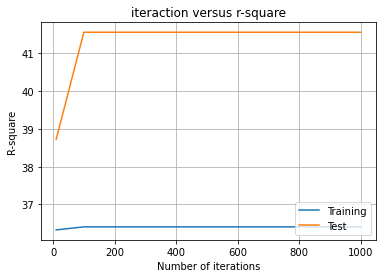

In [26]:
plt.title("iteraction versus r-square")
plt.plot(num_iters, rsq_iter)
plt.plot(num_iters, rsq_iter1)
plt.xlabel("Number of iterations")
plt.ylabel("R-square")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

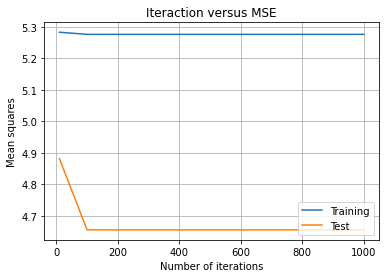

In [27]:
plt.title("Iteraction versus MSE")
plt.plot(num_iters,mse_iter) #training set
plt.plot(num_iters, mse_iter1) #testing set
plt.xlabel("Number of iterations")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

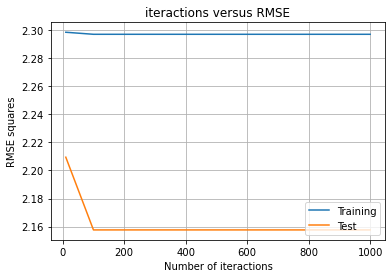

In [28]:
#Iterations versus RMSE
rmse_iter = np.sqrt(mse_iter)
rmse_iter1 = np.sqrt(mse_iter1)
plt.title("iteractions versus RMSE")
plt.plot(num_iters,rmse_iter)
plt.plot(num_iters, rmse_iter1)
plt.xlabel("Number of iteractions")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

## Running different learning rates to see the behavior of the data with values 
## learning_rate = [0.01, 0.05, 0.001, 0.0049, 0.005, 0.0001, 0.0005, 0.0001]

In [29]:
def different_learning(X_alpha, y_alpha, num_rows, learning_rate):
    rsq_all = []
    mse_all = []
    w = []
    for i in learning_rate:
        results = multiple_linear_reg_model_gda(X_alpha, y_alpha, i , n_train, 100)
        print("w: ", results[0], "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])
        rss = 0
        for i in range(num_rows):
            rss += (np.dot(results[0].T,X_alpha[i])-y_alpha[i])**2
        tss = np.sum((y_alpha-np.mean(y_alpha))**2 )# TSS 
        #print("RSS:",rss,"TSS:", tss)
        rsq = 1 - (rss/tss)
        print("rsq:", rsq[0])
        mse_all.append(1/num_rows * rss)
        rsq_all.append(rsq[0]*100)
        print('-'*50)
        w.append(results[0])
    return rsq_all, mse_all, w

In [30]:
learning_rate = [0.1, 0.05,0.005, 0.00490, .001, 0.0005 ,0.0001]
rsq_alpha, mse_alpha, w_alpha = different_learning(X_1_train, y_2d_train, n_train, learning_rate)
rsq_alpha1, mse_alpha1, w_alpha1 = different_learning(X_1_test, y_2d_test, n_test, learning_rate)

w:  [[ 1.15792961e+01]
 [ 7.02915020e-01]
 [ 1.88439732e-01]
 [ 6.64620962e-02]
 [ 4.11033155e-02]
 [ 1.42646524e-01]
 [ 1.88472492e-01]
 [ 2.84746514e-01]
 [ 9.27623783e-02]
 [ 4.23402621e-03]
 [ 3.01490826e-01]
 [-7.67794224e-01]
 [-4.19462916e-01]
 [ 1.18745517e-02]
 [-7.25512602e-02]
 [ 7.85008846e-02]
 [-1.17923762e-01]
 [ 4.92862845e-01]
 [ 6.27630349e-02]
 [-8.70535072e-02]
 [ 2.68875499e-02]
 [-1.78932844e-01]
 [ 4.45467700e-03]
 [-1.47198471e-01]
 [-1.08019643e-01]
 [-2.09106724e-01]
 [-1.92063655e-01]] 
initial cost:  70.87754498714658 
final cost:  2.637993603139872
rsq: 0.3640454420989968
--------------------------------------------------
w:  [[ 1.14869987e+01]
 [ 6.43002053e-01]
 [ 1.77912147e-01]
 [ 6.09602844e-02]
 [ 7.98190518e-02]
 [ 1.57981965e-01]
 [ 2.32181689e-01]
 [ 2.67023447e-01]
 [ 1.33280606e-01]
 [-8.12121502e-03]
 [ 3.32721789e-01]
 [-7.70805613e-01]
 [-4.08990998e-01]
 [-4.99312322e-03]
 [-6.58432045e-02]
 [ 8.04141469e-02]
 [-1.18928683e-01]
 [ 4.87631789e

In [31]:
# The best rsq on training set based off different alphas
print("The best rsq based off different alpha:", max(rsq_alpha))

The best rsq based off different alpha: 36.40454420989968


In [32]:
# The best rsq on testing set based off different alphas
#Though rsq seems to be wrong, the overall mse and rmse, is simulating the problem 
print("The best rsq based off different alpha:", max(rsq_alpha1)) 

The best rsq based off different alpha: 41.42132795964651


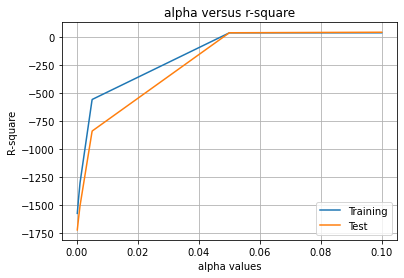

In [33]:
#print(rsq_alpha)
plt.title("alpha versus r-square")
plt.plot(learning_rate, rsq_alpha)
plt.plot(learning_rate, rsq_alpha1)
plt.xlabel("alpha values")
plt.ylabel("R-square")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

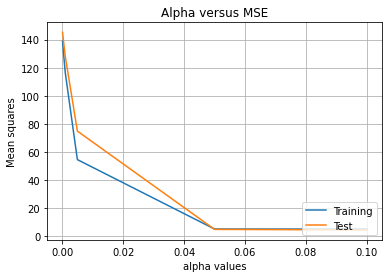

In [34]:
#Learning rate versus Mean squared error
plt.title("Alpha versus MSE")
plt.plot(learning_rate,mse_alpha)
plt.plot(learning_rate,mse_alpha1)
plt.xlabel("alpha values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

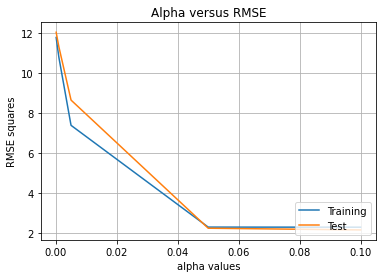

In [35]:
#Learning rate versus RMSE
rmse_alpha = np.sqrt(mse_alpha)
rmse_alpha1 = np.sqrt(mse_alpha1)
plt.title("Alpha versus RMSE")
plt.plot(learning_rate,rmse_alpha)
plt.plot(learning_rate,rmse_alpha1)
plt.xlabel("alpha values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

# Using sklearn library to calculate
## Code below are taken from the demo 02. Mostly used to check whether code above is correct and also to get the graph of the y_prediction (yhat) and y - actual value which would give us a visual for why r-squared is considerably low

In [36]:
#Creating our regression
#Code from DEMO 2
regr = linear_model.LinearRegression()
regr.fit(X_train,y_2d_train)

LinearRegression()

In [37]:
#Code from demo 2
print('The intercept w0 = ', regr.intercept_)
print('The coefficients w[1..d]=', regr.coef_)
print('The rsq(r^2) = ', regr.score(X_train, y_2d_train))

The intercept w0 =  [11.58162302]
The coefficients w[1..d]= [[ 0.70742806  0.18952032  0.06648924  0.03776974  0.14097733  0.18533463
   0.28681843  0.0889098   0.00242287  0.29761798 -0.76723777 -0.42115534
   0.01197947 -0.07268812  0.07786672 -0.11766863  0.49351353  0.06387815
  -0.08815284  0.02557757 -0.18111251  0.01052245 -0.13641422 -0.11930241
  -0.20680433 -0.19684003]]
The rsq(r^2) =  0.3640625184809738


In [38]:
#Code from demo 2
y_tr_pred = regr.predict(X_train)
RSS = np.sum((y_tr_pred-y_2d_train)**2)
TSS = np.sum((y_2d_train - np.mean(y_2d_train))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/y_train.shape[0]))
print("RMSE = {0:f}".format(np.sqrt(RSS/y_train.shape[0])))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 2052.303914
Ein = 5.275846
RMSE = 2.296921
R^2 = 0.364063


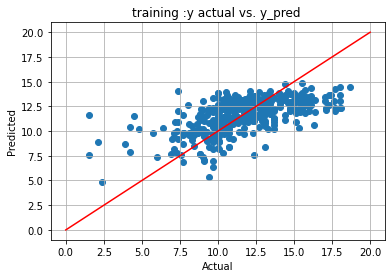

In [39]:
#Code from demo 2
plt.title("training :y actual vs. y_pred ")
plt.scatter(y_2d_train,y_tr_pred)
#Set to 20, because maximum score for y is 20
plt.plot([0, 20],[0, 20],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

# Validating over the testing set

In [40]:
#Code from demo 2
#Testing set seems to be getting different values compared to my test
y_test_pred = regr.predict(X_test)
RSS = np.sum((y_test_pred-y_2d_test)**2)
TSS = np.sum((y_2d_test - np.mean(y_2d_test))**2)
print("RSS = {0:f}".format(RSS))
print("Ein = {0:f}".format(RSS/n_test))
print("RMSE = {0:f}".format(np.sqrt(RSS/n_test)))
print("R^2 = {0:f}".format(1-RSS/TSS))

RSS = 1348.857896
Ein = 5.187915
RMSE = 2.277699
R^2 = 0.348754


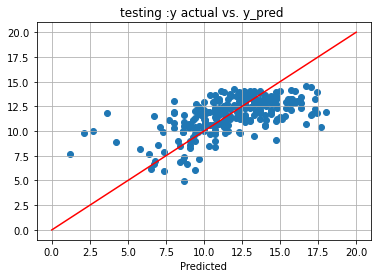

In [41]:
#Code from demo 2
plt.title("testing :y actual vs. y_pred ")
plt.scatter(y_2d_test,y_test_pred)
plt.plot([0,20],[0,20],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()

# Attempting to use regularization in hopes of getting better rsq values
### Will be using the sklearn regularization library, below is the link to the library
### https://scikit-learn.org/stable/modules/linear_model.html

# ridge regression

In [42]:
def ridge(X_ridge, y_ridge, lamda):
    rsq = {}
    mse = []
    w_ridge = []
    for l in lamda:
        ridgereg = linear_model.Ridge(alpha = l)
        ridgereg.fit(X_ridge, y_ridge)
        #print('The intercept w0 = ', ridgereg.intercept_)
        #print('The coefficients w[1..d]=', ridgereg.coef_)
        #print('The rsq(r^2) = ', ridgereg.score(X_ridge, y_ridge))
        #print('-'* 70)
        rsq[l] = ridgereg.score(X_ridge, y_ridge)*100
        weight =ridgereg.coef_
        y_ridge_pred = ridgereg.predict(X_ridge)
        w_ridge.append(weight)
        rss = np.sum((y_ridge_pred - y_ridge)**2)
        mse.append(1/len(X_ridge)* rss)
    return rsq, w_ridge, mse

In [43]:
lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
rsq_train,w_ridge_train,mse_ridge_train = ridge(X_train, y_2d_train, lamda) #Couldn't use x_1_train due to matrix size difference
rsq_test, w_ridge_test,mse_ridge_test = ridge(X_test, y_2d_test, lamda) 
print("Ridge library on training set: ", rsq_train)
print("*"*60)
print("Ridge library on testing set: ", rsq_test)

Ridge library on training set:  {0.001: 36.40625184793461, 0.01: 36.4062518318216, 0.1: 36.406250221637436, 0.5: 36.40621131037317, 1: 36.40609031215103, 10: 36.39113562388141, 100: 35.50684346275117}
************************************************************
Ridge library on testing set:  {0.001: 41.55835132931942, 0.01: 41.55835128114062, 0.1: 41.558346470147015, 0.5: 41.55823059841336, 1: 41.55787215215846, 10: 41.516316616748725, 100: 39.70992294767717}


In [44]:
#Reshaping the weight list
w_ridge_train = np.array(w_ridge_train).reshape((len(lamda),26))
w_ridge_test = np.array(w_ridge_test).reshape((len(lamda),26))

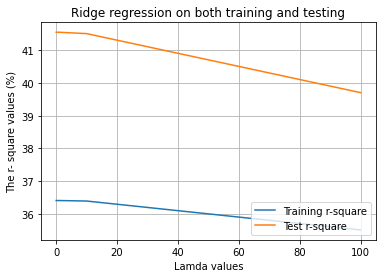

In [45]:
plt.title("Ridge regression on both training and testing")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(rsq_train.keys(), rsq_train.values())
plt.plot(rsq_test.keys(),rsq_test.values())
plt.grid()
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')

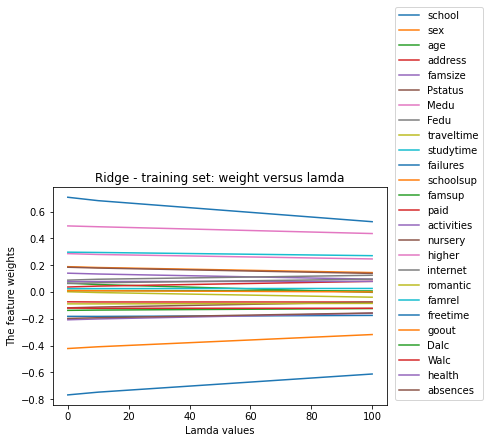

In [46]:
plt.title("Ridge - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_train)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

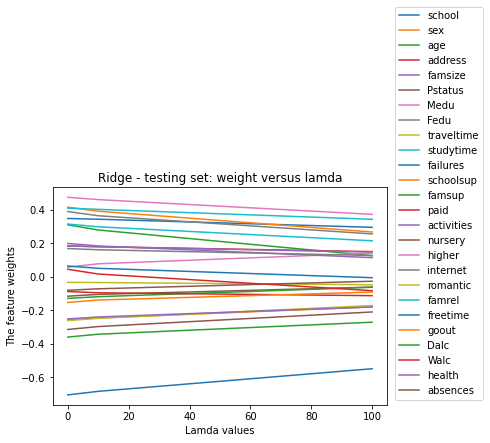

In [47]:
plt.title("Ridge - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_ridge_test)
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

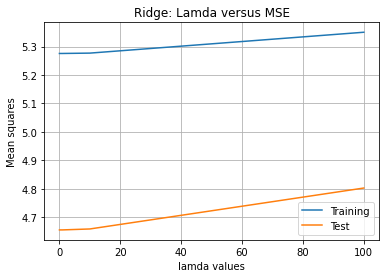

In [48]:
#Learning rate versus Mean squared error
plt.title("Ridge: Lamda versus MSE")
plt.plot(lamda,mse_ridge_train)
plt.plot(lamda,mse_ridge_test)
plt.xlabel("lamda values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

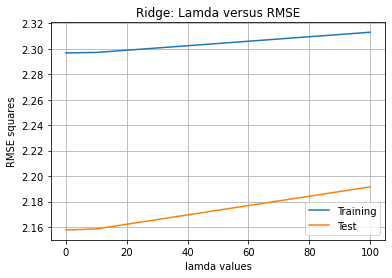

In [49]:
#Learning rate versus RMSE
rmse_ridge_tr = np.sqrt(mse_ridge_train)
rmse_ridge_test = np.sqrt(mse_ridge_test)
plt.title("Ridge: Lamda versus RMSE")
plt.plot(lamda,rmse_ridge_tr)
plt.plot(lamda,rmse_ridge_test)
plt.xlabel("lamda values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

## Multiple regression with Lasso

In [50]:
def lasso(X_lasso, y_lasso):
    lamda = [0.001, 0.01, 0.1, 0.5, 1, 10, 100]
    rsq = {}
    w = []
    mse = []
    for l in lamda:
        lasso_reg = linear_model.Lasso(alpha = l)
        lasso_reg.fit(X_lasso, y_lasso)
        #print('The intercept w0 = ', regr.intercept_)
        #print('The coefficients w[1..d]=', regr.coef_)
        #print('The rsq(r^2) = ', lasso_reg.score(X_train, y_2d_train))
        #print('-'* 70)
        rsq[l] = lasso_reg.score(X_lasso, y_lasso)*100
        weight = lasso_reg.coef_
        y_lasso_pred = lasso_reg.predict(X_lasso)
        w.append(weight)
        #mse_test = metrics.mean_squared_error(y_lasso, y_lasso_pred) <--used this only to check my work
        rss = 0
        for i in range(len(X_lasso)):
            rss += (y_lasso_pred[i] - y_lasso[i])**2
        #print(rss)
        mse.append(1/len(X_lasso)* rss[0])
    return rsq, w, mse

In [51]:
rsq_lasso_train, w_lasso_tr, mse_lasso_train = lasso(X_train, y_2d_train) #Couldn't use x_1_train due to matrix size difference
rsq_lasso_test, w_lasso_test, mse_lasso_test = lasso(X_test, y_2d_test) 
print("Lasso library on training set: ", rsq_lasso_train)
print("*"*60)
print("Lasso library on testing set: ", rsq_lasso_test)
#print(mse_lasso_train)

Lasso library on training set:  {0.001: 36.40592237814631, 0.01: 36.379716958805076, 0.1: 34.59772258171368, 0.5: 21.933358391448376, 1: 3.2808726330941007, 10: 0.0, 100: 0.0}
************************************************************
Lasso library on testing set:  {0.001: 41.55785899204525, 0.01: 41.5120048513749, 0.1: 38.811937233252955, 0.5: 23.038295655872286, 1: 6.2294633413695895, 10: 0.0, 100: 0.0}


In [52]:
#Reshaping the weight list
w_lasso_tr = np.array(w_lasso_tr).reshape((len(lamda),26))
w_lasso_test = np.array(w_lasso_test).reshape((len(lamda),26))

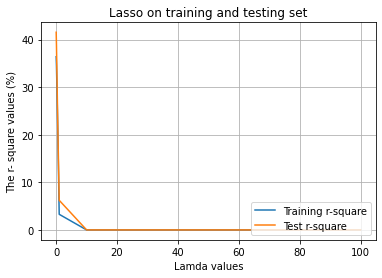

In [53]:
plt.title("Lasso on training and testing set")
plt.xlabel("Lamda values")
plt.ylabel("The r- square values (%)")
plt.plot(rsq_lasso_train.keys(), rsq_lasso_train.values())
plt.plot(rsq_lasso_test.keys(), rsq_lasso_test.values())
plt.legend(['Training r-square', 'Test r-square'], loc='lower right')
plt.grid()

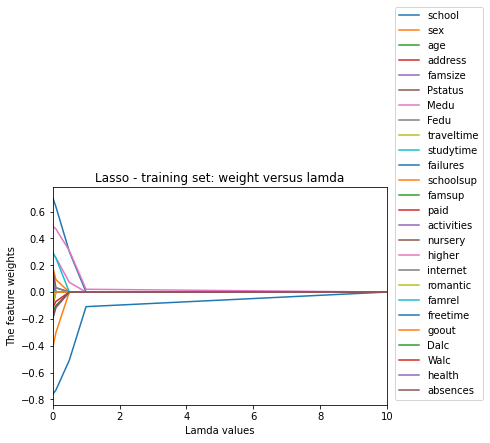

In [54]:
plt.title("Lasso - training set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_tr)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

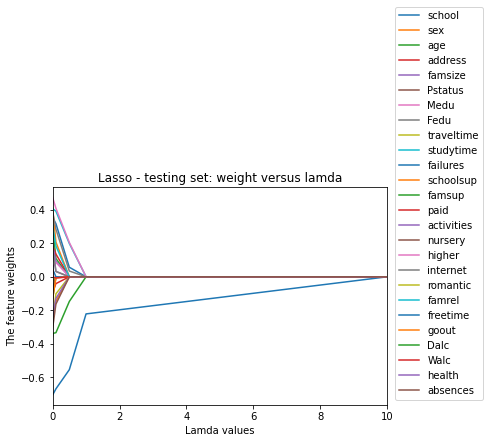

In [55]:
plt.title("Lasso - testing set: weight versus lamda")
plt.xlabel("Lamda values")
plt.ylabel("The feature weights")
plt.plot(lamda, w_lasso_test)
plt.xlim(0,10) #Limiting x to see the weight better
plt.legend(X_fixed.columns, bbox_to_anchor=(1.3, 0), loc='lower right') 

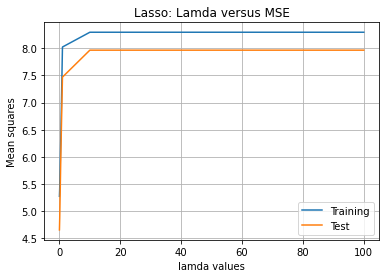

In [56]:
#Learning rate versus Mean squared error
plt.title("Lasso: Lamda versus MSE")
plt.plot(lamda,mse_lasso_train)
plt.plot(lamda,mse_lasso_test)
plt.xlabel("lamda values")
plt.ylabel("Mean squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

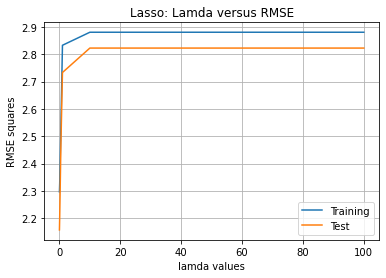

In [57]:
#Learning rate versus RMSE
rmse_lasso_tr = np.sqrt(mse_lasso_train)
rmse_lasso_test = np.sqrt(mse_lasso_test)
plt.title("Lasso: Lamda versus RMSE")
plt.plot(lamda,rmse_lasso_tr)
plt.plot(lamda,rmse_lasso_test)
plt.xlabel("lamda values")
plt.ylabel("RMSE squares")
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()

# Polynomial Regression using Sklearn library Polynomial Features
## https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
## Used this to understand how to use Polynomial features :
### https://harvard-iacs.github.io/2018-CS109A/labs/lab-4/student/ 

In [58]:
def poly_reg(x_poly, y_poly,n_rows,  model_degree, dataset):
    mse_poly = []
    rsq_poly = []
    w_poly = []
    for d in model_degree:
        print('-'*50)
        print("Degree:", d)
        poly_feat = PolynomialFeatures(d)
        x_fitted = poly_feat.fit_transform(x_poly) #for multiple features
        poly_lin = linear_model.LinearRegression()
        poly_lin.fit(x_fitted, y_poly)
        y_poly_pred = poly_lin.predict(x_fitted)
        y_poly_pred = y_poly_pred.reshape(len(y_poly), 1)
        #print('The intercept w0 = ', poly_lin.intercept_)
        #print('The coefficients w[1..d]=', poly_lin.coef_)
        rss = np.sum((y_poly_pred-y_poly)**2)
        tss = np.sum((y_poly - np.mean(y_poly))**2)
        rsq = 1-rss/tss
        print("RSS = {0:f}".format(rss))
        print("Ein = {0:f}".format(rss/n_rows))
        print("RMSE = {0:f}".format(np.sqrt(rss/n_rows)))
        print("R^2 = {0:f}".format(rsq))
        print('-'*50)
        #Code from demo 2
        plt.title("Polynomial " + dataset + "- y-actual vs y-predicted")
        plt.grid()
        plt.scatter(y_poly,y_poly_pred)
        plt.plot([0,20],[0,20],'r') 
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.show(block = False)
        mse_poly.append(1/n_rows * rss)
        rsq_poly.append(rsq*100)
        w_poly.append(poly_lin.coef_)
    #print(w_poly)
    return w_poly, rsq_poly, mse_poly

Polynomial on training set:
--------------------------------------------------
Degree: 2
RSS = 122.322057
Ein = 0.314453
RMSE = 0.560761
R^2 = 0.962097
--------------------------------------------------


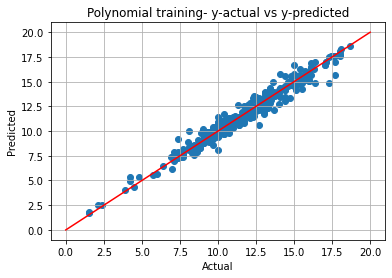

--------------------------------------------------
Degree: 3
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


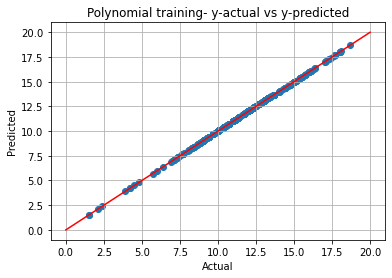

--------------------------------------------------
Degree: 4
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


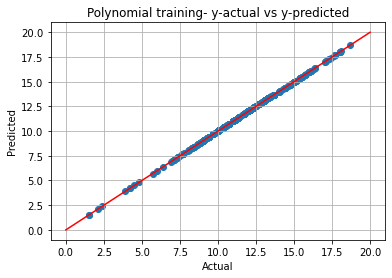

--------------------------------------------------
Degree: 5
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


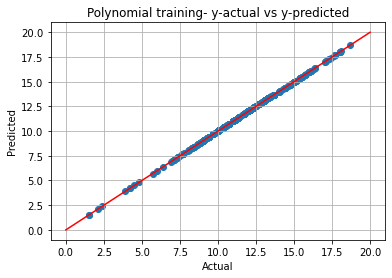

Polynomial on testing set:
--------------------------------------------------
Degree: 2
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


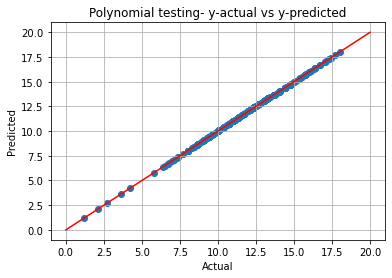

--------------------------------------------------
Degree: 3
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


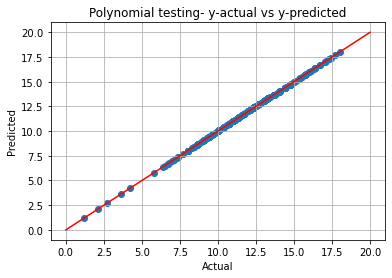

--------------------------------------------------
Degree: 4
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


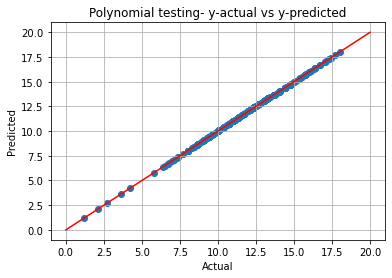

--------------------------------------------------
Degree: 5
RSS = 0.000000
Ein = 0.000000
RMSE = 0.000000
R^2 = 1.000000
--------------------------------------------------


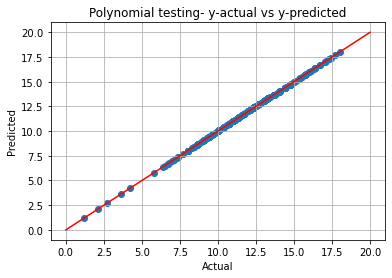

In [59]:
model_degree = np.array(range(2,6))
print("Polynomial on training set:")
w_poly_train, rsq_poly_train, mse_poly_train = poly_reg(X_train,y_2d_train,n_train, model_degree, 'training')
print("Polynomial on testing set:")
w_poly_test, rsq_poly_test, mse_poly_test = poly_reg(X_test,y_2d_test,n_test, model_degree, 'testing')

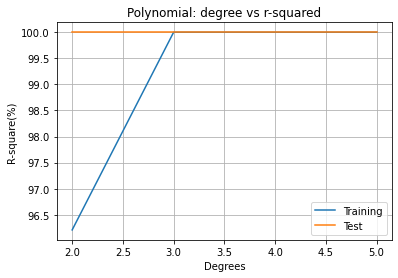

In [60]:
plt.title("Polynomial: degree vs r-squared")
plt.plot(model_degree, rsq_poly_train)
plt.plot(model_degree, rsq_poly_test)
plt.xlabel("Degrees")
plt.ylabel("R-square(%)")
plt.grid()
plt.legend(['Training', 'Test'], loc='lower right')

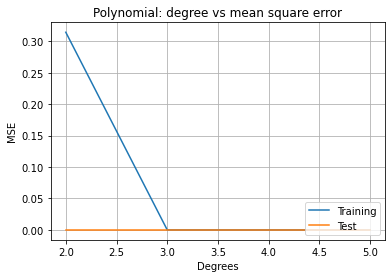

In [61]:
plt.title("Polynomial: degree vs mean square error")
plt.plot(model_degree, mse_poly_train)
plt.plot(model_degree, mse_poly_test)
plt.xlabel("Degrees")
plt.ylabel("MSE")
plt.grid()
plt.legend(['Training', 'Test'], loc='lower right')

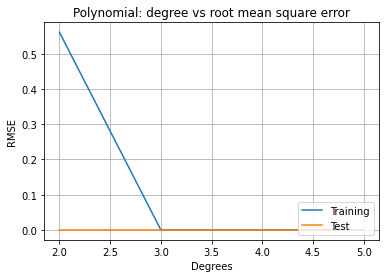

In [62]:
rmse_poly_train = np.sqrt(np.array(mse_poly_train))
rmse_poly_test = np.sqrt(np.array(mse_poly_test))
plt.title("Polynomial: degree vs root mean square error")
plt.plot(model_degree, rmse_poly_train)
plt.plot(model_degree, rmse_poly_test)
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.grid()
plt.legend(['Training', 'Test'], loc='lower right')